In [ ]:
from zipfile import ZipFile
file_name = "/data.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("Done")

Done


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Importing necessary libraries for image processing, model building, and evaluation.
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 40
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)

train_data_dir='/content/data/train'
validation_data_dir='/content/data/test'

# Setting image dimensions and batch size for data augmentation.

# Data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    )

validation_generator = validation_datagen.flow_from_directory(
   validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    )





Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import pandas as pd
import os

def Classes_Count(path, name):
    Classes_Dict = {}

    for Class in os.listdir(path):
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))

    df = pd.DataFrame(Classes_Dict, index=[name])

    return df

# Specify the correct paths to your training and validation directories
train_data_dir = '/content/data/train'
validation_data_dir = '/content/data/test'

Train_Count = Classes_Count(train_data_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(validation_data_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

# Concatenate the dataframes
result = pd.concat([Train_Count, Test_Count], axis=1)
print(result)

          Train  Test
happy      7215  1774
neutral    4965  1233
sad        4830  1247
fear       4097  1024
angry      3995   958
surprise   3171   831
disgust     436   111


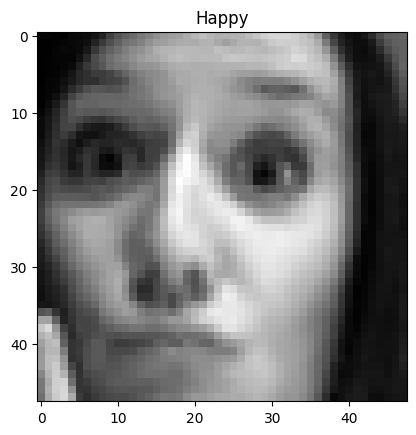

In [ ]:

# Creating data generators to load and preprocess the training and validation data from the specified directories.

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization





input_shape = (48,48,1)



# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# Display model summary
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_130 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 activation_44 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 conv2d_163 (Conv2D)         (None, 48, 48, 128)       204928    
                                                                 
 batch_normalization_131 (Ba  (None, 48, 48, 128)      512       
 tchNormalization)                                               
                                                                 
 activation_45 (Activation)  (None, 48, 48, 128)     

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical




# Define paths and other parameters
train_path = "data/train/"
test_path = "data/test"
epochs = 80
batch_size = 64


policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


# Define callbacks

checkpoint = ModelCheckpoint('emotion_detection_model_100epochs.h5', monitor='val_loss', save_best_only=True)





# Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[ checkpoint ],
    shuffle=True,
    validation_split=0.2
)


# Save the model
model.save('emotion_detection_model_100epochs.h5')








Epoch 1/80


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


717/717 [==============================] - 65s 90ms/step - loss: 0.8814 - accuracy: 0.6724 - val_loss: 0.9660 - val_accuracy: 0.6500
Epoch 2/80
717/717 [==============================] - 63s 88ms/step - loss: 0.8806 - accuracy: 0.6724 - val_loss: 0.9949 - val_accuracy: 0.6374
Epoch 3/80
717/717 [==============================] - 64s 90ms/step - loss: 0.8772 - accuracy: 0.6724 - val_loss: 0.9827 - val_accuracy: 0.6378
Epoch 4/80
717/717 [==============================] - 65s 91ms/step - loss: 0.8729 - accuracy: 0.6753 - val_loss: 0.9794 - val_accuracy: 0.6438
Epoch 5/80
717/717 [==============================] - 62s 87ms/step - loss: 0.8664 - accuracy: 0.6763 - val_loss: 1.0007 - val_accuracy: 0.6331
Epoch 6/80
717/717 [==============================] - 63s 87ms/step - loss: 0.8623 - accuracy: 0.6787 - val_loss: 0.9585 - val_accuracy: 0.6489
Epoch 7/80
717/717 [==============================] - 63s 88ms/step - loss: 0.8569 - accuracy: 0.6816 - val_loss: 1.0044 - val_accuracy: 0.6296
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


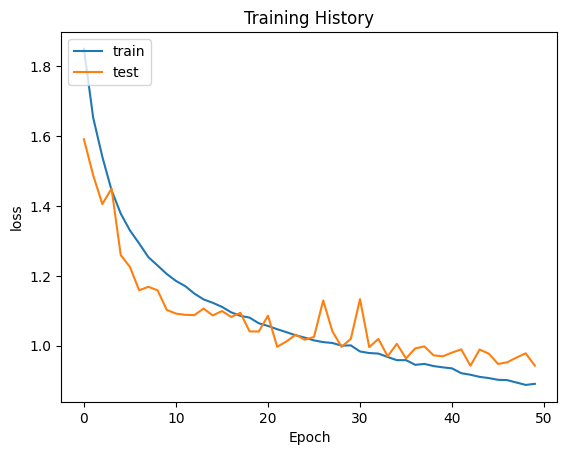

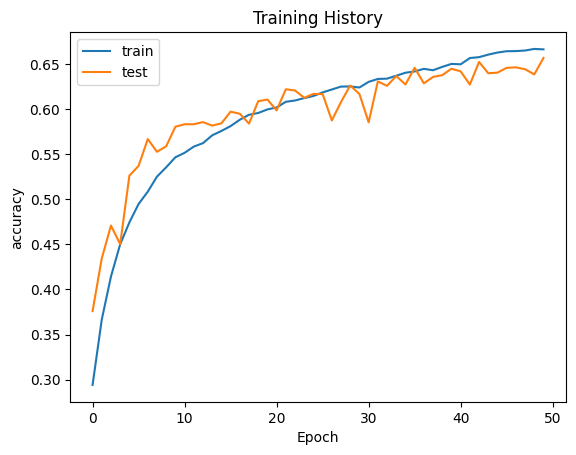

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [ ]:
from keras.models import load_model

# Load the trained model
my_model = load_model('emotion_detection_model_100epochs.h5')

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on training and validation data
train_loss, train_acc = my_model.evaluate(train_generator)
test_loss, test_acc = my_model.evaluate(validation_generator)

# Print the final accuracy
print("Final Train Accuracy: {:.2f}%".format(train_acc * 100))
print("Final Validation Accuracy: {:.2f}%".format(test_acc * 100))


  1/718 [..............................] - ETA: 2:07 - loss: 0.5107 - accuracy: 0.8500

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


113/113 [==============================] - 4s 32ms/step - loss: 1.0024 - accuracy: 0.6758
Final Train Accuracy: 83.40%
Final Validation Accuracy: 67.58%


Found 7178 images belonging to 7 classes.
  1/113 [..............................] - ETA: 7s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


113/113 [==============================] - 3s 26ms/step


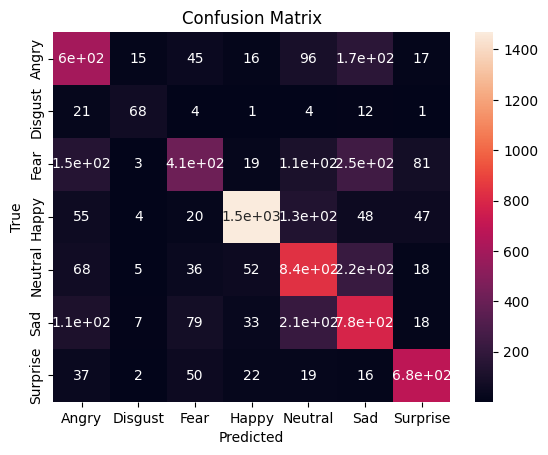

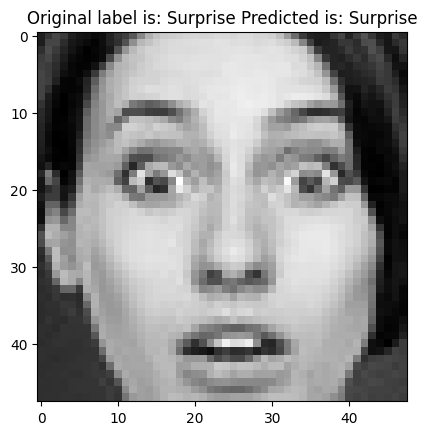

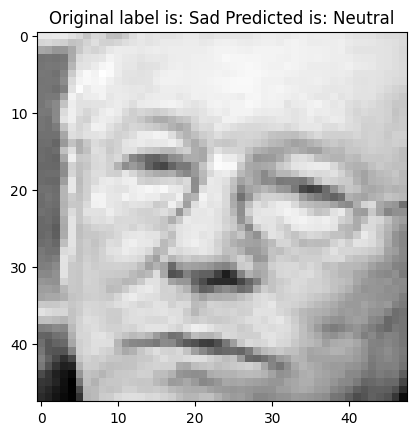

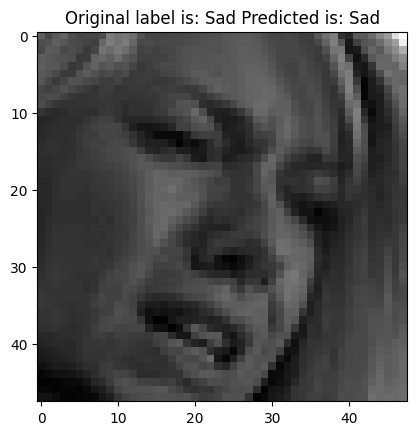

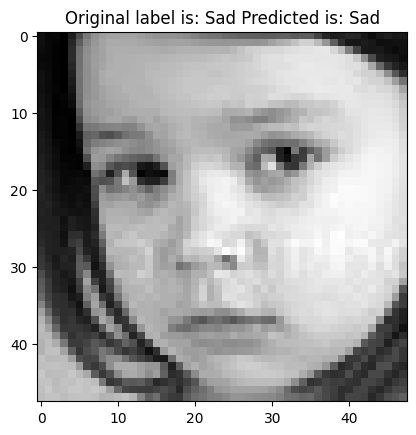

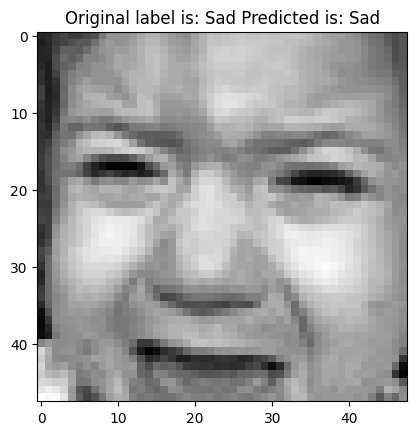

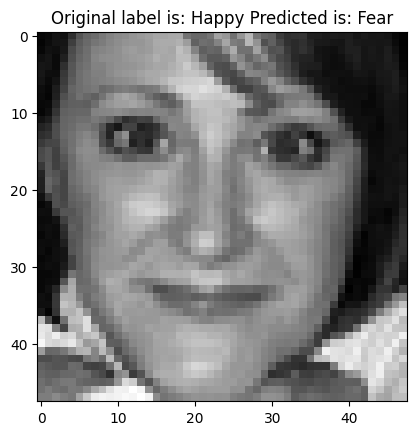

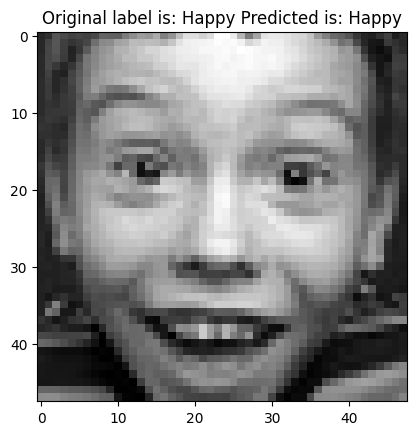

In [ ]:
import numpy as np
import os
import cv2
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load the pre-trained model
my_model = load_model('emotion_detection_model_100epochs.h5')

# Define paths and other parameters
validation_data_dir = "data/test"
batch_size = 64

# Create the data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the number of steps for prediction
test_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Get predictions from the model
predictions = my_model.predict(validation_generator, steps=test_steps)
predicted_labels = np.argmax(predictions, axis=1)

# Load true labels
test_labels = validation_generator.classes

# Plotting the confusion matrix
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Check results on a few select images
num_display_images = 7 # You can change this number as desired

for _ in range(num_display_images):
    n = random.randint(0, len(validation_generator.filenames) - 1)
    image_path = os.path.join(validation_data_dir, validation_generator.filenames[n])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    orig_labl = class_labels[test_labels[n]]
    pred_labl = class_labels[predicted_labels[n]]

    plt.imshow(image, cmap='gray')
    plt.title("Original label is: " + orig_labl + " Predicted is: " + pred_labl)
    plt.show()


In [ ]:
from zipfile import ZipFile
file_name = "/test_images (1).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Enable eager execution
import tensorflow as tf
tf.config.run_functions_eagerly(True)

def preprocess_new_images_from_folder(folder_path):
    preprocessed_images = []
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, (48, 48))  # Resize the image
            normalized_image = resized_image / 255.0      # Normalize pixel values
            preprocessed_image = np.expand_dims(normalized_image, axis=-1)
            preprocessed_images.append(preprocessed_image)

    return np.array(preprocessed_images)

# Test the model on new images from the 'data' folder
my_model = load_model('emotion_detection_model_100epochs.h5', compile=True)
new_images_folder_path = '/content/datasetmovie'
# List all image files in the 'data' folder
image_files = [os.path.join(new_images_folder_path, filename) for filename in os.listdir(new_images_folder_path) if filename.endswith(('.jpg'))]

# Load and preprocess the images
preprocessed_images = []
for image_file in image_files:
    image = cv2.imread(image_file)
    if image is not None:
        resized_image = cv2.resize(image, (48, 48))  # Resize the image
        normalized_image = resized_image / 255.0      # Normalize pixel values
        preprocessed_image = np.expand_dims(normalized_image, axis=-1)
        preprocessed_images.append(preprocessed_image)

# Convert the list of images to numpy array
preprocessed_images = np.array(preprocessed_images)

# Path to the folder containing new images
new_images_folder_path = '/content/datasetmovie'

# Preprocess new images
preprocessed_images = preprocess_new_images_from_folder(new_images_folder_path)

# Print the shape of the preprocessed images array
print("Shape of preprocessed images:", preprocessed_images.shape)

# Check if the array is not empty
if preprocessed_images.shape[0] > 0:
    print("Preprocessed images are not empty.")
else:
    print("Preprocessed images array is empty.")


Shape of preprocessed images: (176, 48, 48, 1)
Preprocessed images are not empty.


In [ ]:
import tensorflow as tf
# Load the trained model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)  # Set run_eagerly=True

# Load and preprocess new images from the 'data' folder
new_images_folder_path = '/content/datasetmovie'
preprocessed_images = preprocess_new_images_from_folder(new_images_folder_path)

# Make predictions using the model
with tf.device('/GPU:0'):  # Run predictions on CPU to avoid potential issues
    predictions = my_model.predict(preprocessed_images, batch_size=1)

# Map predictions to class labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_emotions = [class_labels[idx] for idx in predicted_class_indices]

# Print the predicted emotions
print("Predicted Emotions:", predicted_emotions)








/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


176/176 [==============================] - 3s 14ms/step
Predicted Emotions: ['Surprise', 'Neutral', 'Sad', 'Sad', 'Sad', 'Sad', 'Neutral', 'Sad', 'Angry', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Fear', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Happy', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Happy', 'Happy', 'Neutral', 'Sad', 'Sad', 'Fear', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Neutral', 'Sad', 'Sad', 'Sad', 'Sad', 'Fear', 'Sad', 'Neutral', 'Sad', 'Sad', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Angry', 'Sad', 'Sad', 'Happy', 'Neutral', 'Fear', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Neutral', 'Sad', 'Sad', 'Sad', 'Fe